In [20]:
import pandas as pd
df=pd.read_csv("train_titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [21]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [22]:
df.shape

(891, 12)

In [23]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [24]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
cols=["Survived","Pclass","Sex","Embarked"]
import matplotlib.pyplot as plt
import seaborn as sns

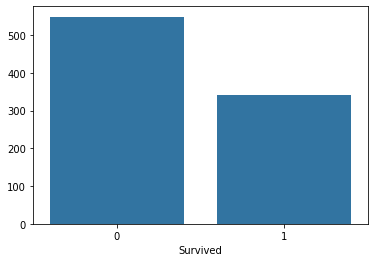

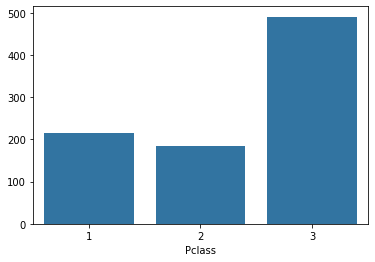

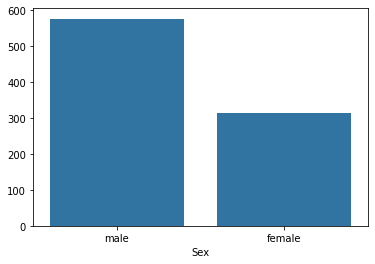

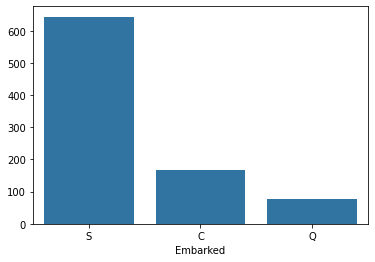

In [26]:
for col in cols:
    sns.barplot(x=df[col].value_counts().index,y=df[col].value_counts().values)
    plt.show()

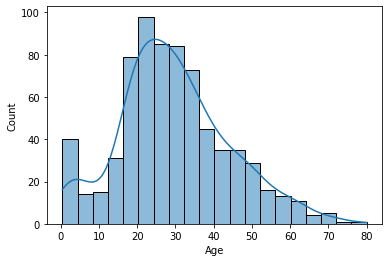

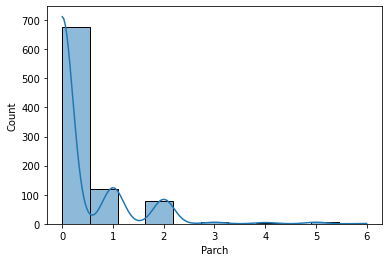

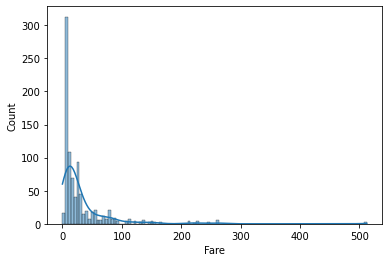

In [27]:
cols=["Age","Parch","Fare"]
for col in cols:
    sns.histplot(x=col,data=df,kde=True)
    plt.show()

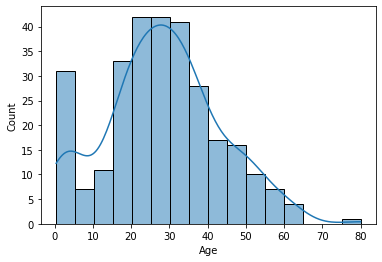

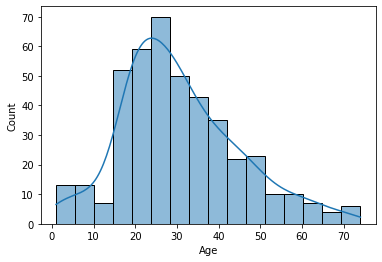

In [28]:
sur_df=df[df["Survived"]==1]
not_surdf=df[df["Survived"]==0]
sns.histplot(x='Age',data=sur_df,kde=True)
plt.show()

sns.histplot(x='Age',data=not_surdf,kde=True)
plt.show()

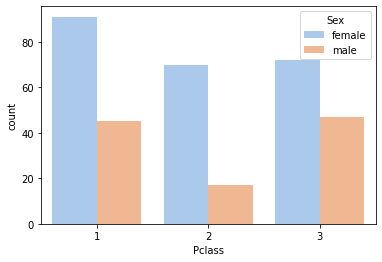

In [29]:
sns.countplot(x='Pclass',hue="Sex",data=sur_df,palette="pastel")
plt.show()

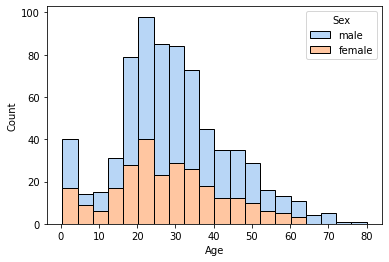

In [30]:
sns.histplot(x='Age',hue='Sex',data=df,palette="pastel",multiple="stack")
plt.show()

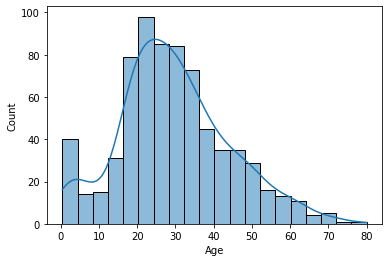

In [31]:
sns.histplot(x='Age',data=df,kde=True)
plt.show()

In [32]:
df['Embarked']=df['Embarked'].fillna('S')

In [33]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [35]:
mean=df['Age'].mean()
std=df['Age'].std()
import numpy as np
random_ages=np.random.normal(loc=mean,scale=std,size=df['Age'].isnull().sum())
df.loc[df['Age'].isnull(),'Age']=random_ages

In [36]:
df['Age'].isnull().sum()

0

In [37]:
df['FamilySize']=df['Parch']+df['SibSp']+1

In [38]:
df['IsAlone']=df['FamilySize']==1

In [39]:
df['Has_cabin']=~df['Cabin'].isnull()

In [41]:
df=df.drop(columns=["PassengerId","Name","Ticket","Cabin"])

In [42]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin
0,0,3,male,22.000000,1,0,7.2500,S,2,False,False
1,1,1,female,38.000000,1,0,71.2833,C,2,False,True
2,1,3,female,26.000000,0,0,7.9250,S,1,True,False
3,1,1,female,35.000000,1,0,53.1000,S,2,False,True
4,0,3,male,35.000000,0,0,8.0500,S,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,1,True,False
887,1,1,female,19.000000,0,0,30.0000,S,1,True,True
888,0,3,female,27.729118,1,2,23.4500,S,4,False,False
889,1,1,male,26.000000,0,0,30.0000,C,1,True,True


In [43]:
df.select_dtypes(include=['category','object'])

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [45]:
cols=["Sex","Embarked","IsAlone","Has_cabin"]
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cols:
    df[col]=le.fit_transform(df[col])

In [46]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin
0,0,3,1,22.000000,1,0,7.2500,2,2,0,0
1,1,1,0,38.000000,1,0,71.2833,0,2,0,1
2,1,3,0,26.000000,0,0,7.9250,2,1,1,0
3,1,1,0,35.000000,1,0,53.1000,2,2,0,1
4,0,3,1,35.000000,0,0,8.0500,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1,0
887,1,1,0,19.000000,0,0,30.0000,2,1,1,1
888,0,3,0,27.729118,1,2,23.4500,2,4,0,0
889,1,1,1,26.000000,0,0,30.0000,0,1,1,1


In [47]:
cols=["Age","Fare"]
df[cols]=df[cols].apply(pd.to_numeric,errors="coerce")

In [48]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Has_cabin
0,0,3,1,22.000000,1,0,7.2500,2,2,0,0
1,1,1,0,38.000000,1,0,71.2833,0,2,0,1
2,1,3,0,26.000000,0,0,7.9250,2,1,1,0
3,1,1,0,35.000000,1,0,53.1000,2,2,0,1
4,0,3,1,35.000000,0,0,8.0500,2,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1,0
887,1,1,0,19.000000,0,0,30.0000,2,1,1,1
888,0,3,0,27.729118,1,2,23.4500,2,4,0,0
889,1,1,1,26.000000,0,0,30.0000,0,1,1,1


In [49]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Has_cabin     0
dtype: int64

In [50]:
X=df.drop(columns=["Survived"])
y=df["Survived"]

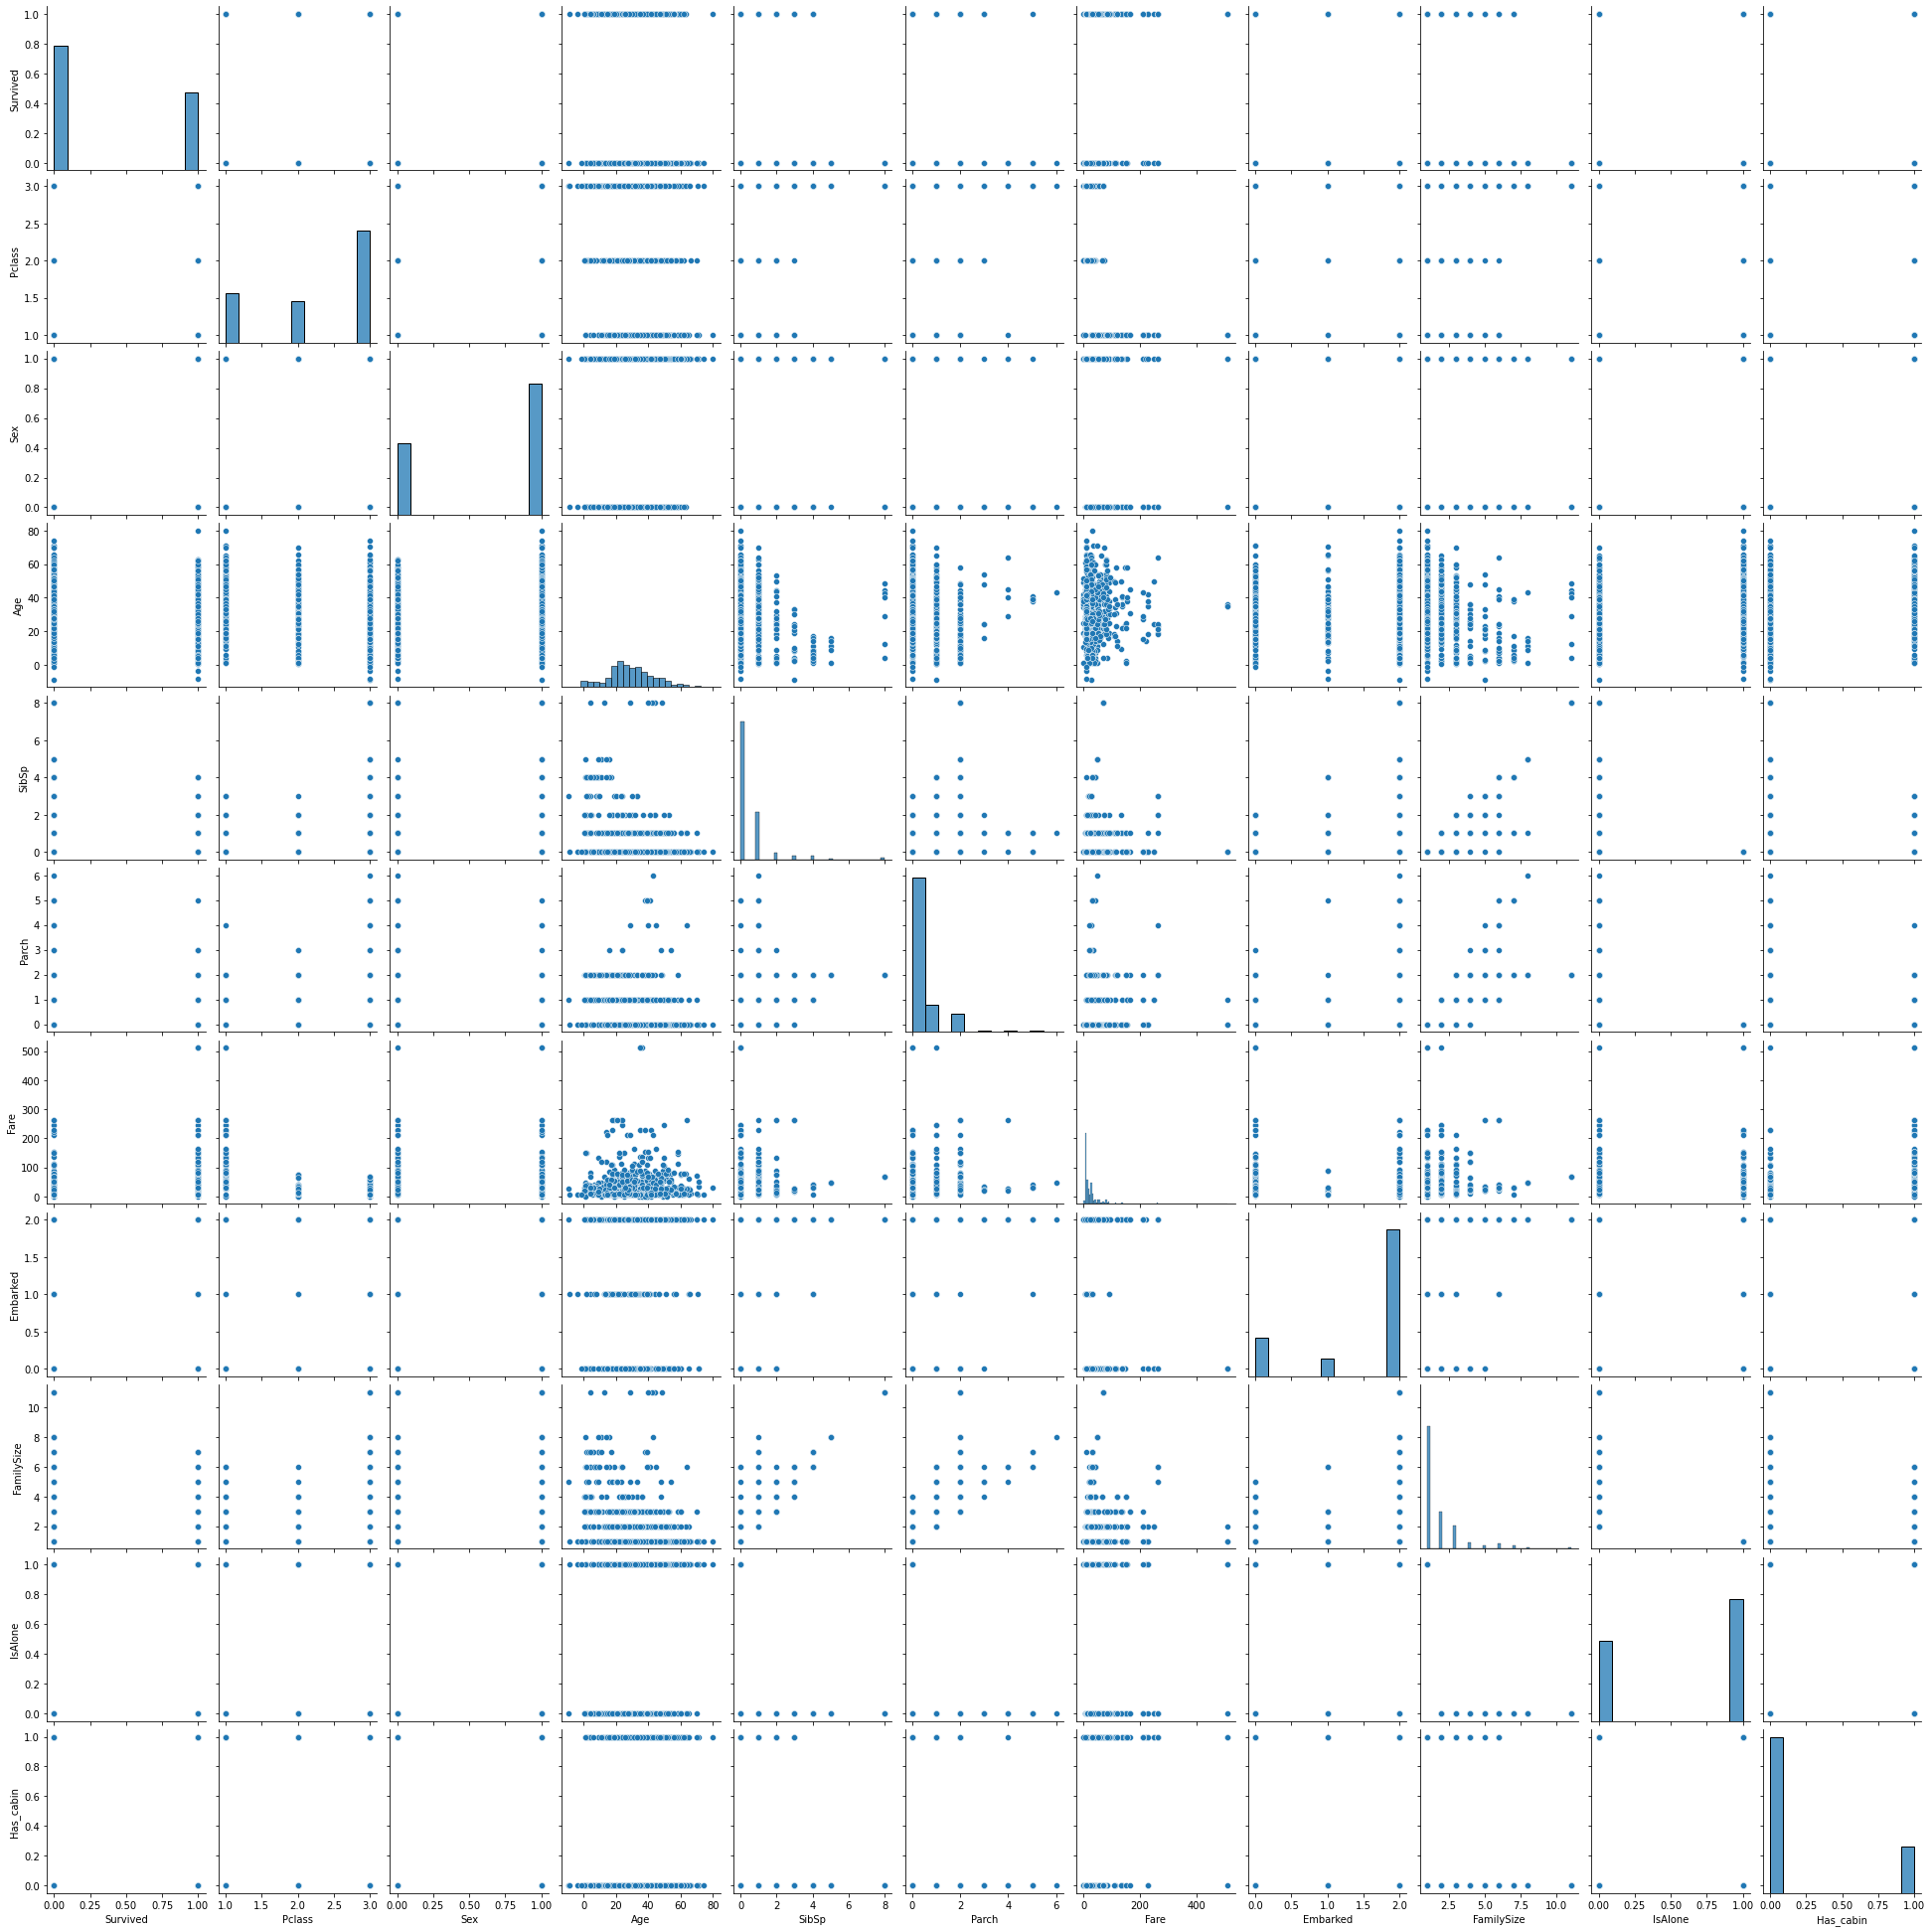

In [51]:
sns.pairplot(df)

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_valid=train_test_split(X,y,test_size=0.1,random_state=42)

In [53]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=42)

In [54]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [55]:
y_pred=model.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_valid,y_pred)

0.8111111111111111

In [58]:
confusion_matrix(y_valid,y_pred)

array([[45,  9],
       [ 8, 28]])

In [61]:
classification_report(y_valid,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.83      0.84        54\n           1       0.76      0.78      0.77        36\n\n    accuracy                           0.81        90\n   macro avg       0.80      0.81      0.80        90\nweighted avg       0.81      0.81      0.81        90\n'

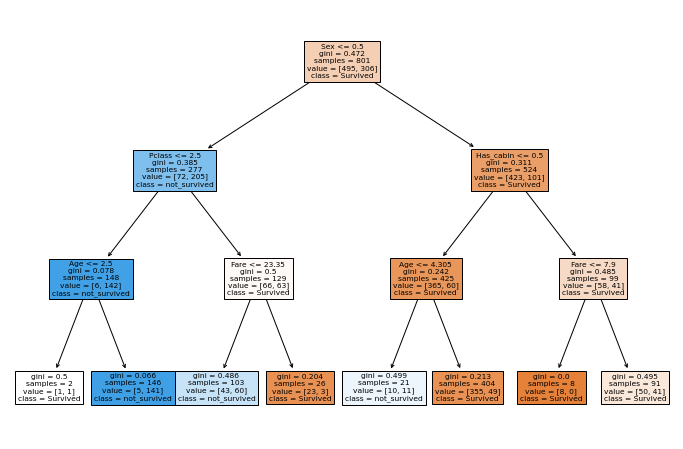

In [63]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(model,feature_names=X.columns,class_names=["Survived","not_survived"],filled=True)
plt.show()

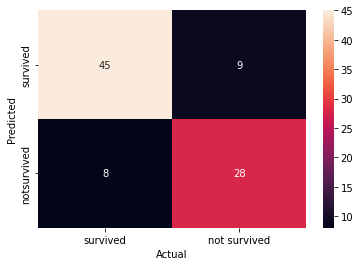

In [65]:
cm=confusion_matrix(y_valid,y_pred)
sns.heatmap(cm,xticklabels=["survived","not survived"],yticklabels=["survived","notsurvived"],fmt='d',annot=True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [67]:
from sklearn.linear_model import LogisticRegression
le=LogisticRegression(max_iter=1000)
le.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [69]:
le.score(X_test,y_valid)

0.8333333333333334

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(X_train,y_train)